<a href="https://colab.research.google.com/github/Pbonmars-20031006/machineLearning/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os
from tqdm import tqdm
from random import shuffle
import shutil

In [3]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip


--2023-10-25 10:36:35--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.120, 52.219.160.211, 52.219.158.39, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  13.3MB/s    in 5.5s    

2023-10-25 10:36:42 (10.5 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [11]:
train_dir="./datset/training"
testing_dir="./datset/testing"

#used to define the prepare the dataset by rescaling them to 1/255 and assign 20% to the training part
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator=train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20,class_mode='binary', subset='training')
validation_generator=train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20,class_mode='binary', subset='validation')

Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [42]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(50,50,1),padding='same'),

    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),

    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),

    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
    #tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
    #model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),

])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator, validation_steps=50)


Epoch 1/20


<ipython-input-43-751deea3cecb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator, validation_steps=50)


993/993 [==============================] - 75s 73ms/step - loss: 0.6909 - accuracy: 0.5850 - val_loss: 0.6208 - val_accuracy: 0.6730
Epoch 2/20
993/993 [==============================] - 71s 72ms/step - loss: 0.6422 - accuracy: 0.6525 - val_loss: 0.5830 - val_accuracy: 0.6920
Epoch 3/20
993/993 [==============================] - 71s 71ms/step - loss: 0.6664 - accuracy: 0.5991 - val_loss: 0.6432 - val_accuracy: 0.6480
Epoch 4/20
993/993 [==============================] - 69s 69ms/step - loss: 0.6364 - accuracy: 0.6458 - val_loss: 0.5772 - val_accuracy: 0.7120
Epoch 5/20
993/993 [==============================] - 69s 70ms/step - loss: 0.6250 - accuracy: 0.6664 - val_loss: 0.5760 - val_accuracy: 0.7110
Epoch 6/20
993/993 [==============================] - 71s 71ms/step - loss: 0.6131 - accuracy: 0.6842 - val_loss: 0.5524 - val_accuracy: 0.7380
Epoch 7/20
993/993 [==============================] - 69s 69ms/step - loss: 0.5977 - accuracy: 0.6897 - val_loss: 0.5641 - val_accuracy: 0.7090
Epo

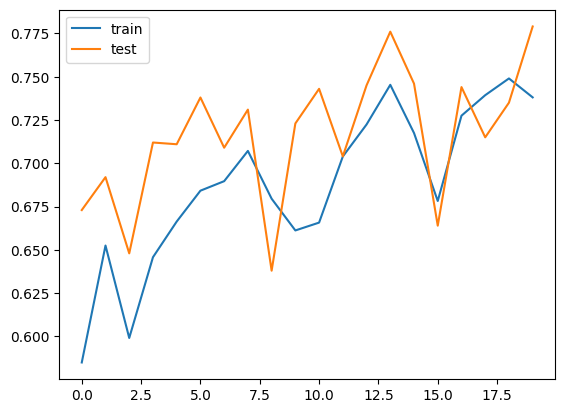

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])

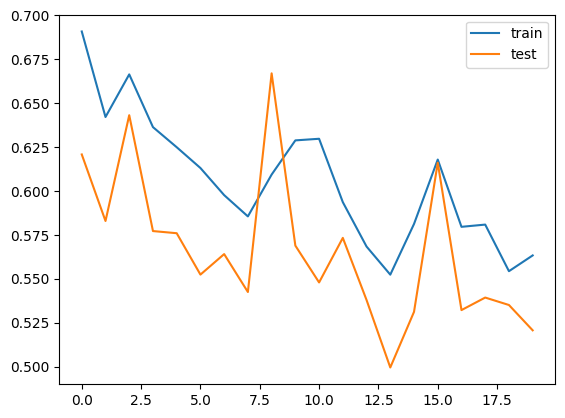

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])

In [55]:
def ans(pred_value):
  if pred_value < 0.5:
    print('cat')
  else:
    print('dog')

In [56]:
#didn't write this on my own
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def Single_Image_Prediction(file):
#     image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.resize(image, (50, 50))
    img_arr = img_to_array(image_gray)
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image




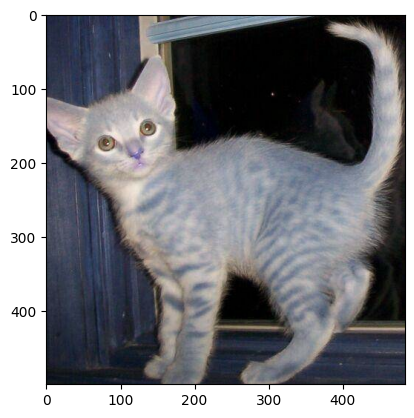

1/1 [==============================] - 0s 26ms/step
cat


In [57]:
image = Single_Image_Prediction('./datset/testing/6.jpg')
pre= model.predict(image)
ans(pre)

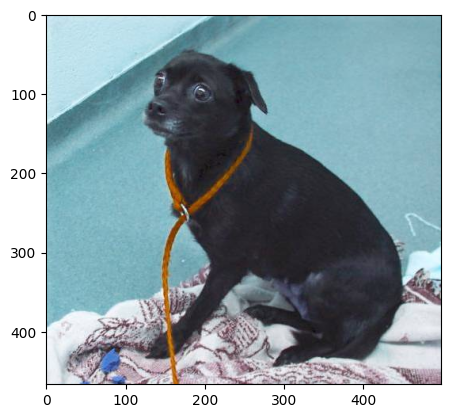

1/1 [==============================] - 0s 46ms/step
dog


In [61]:
image = Single_Image_Prediction('./datset/testing/5.jpg')
pre = model.predict(image)
ans(pre)